# FFT in Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()

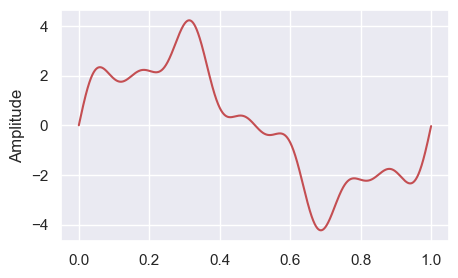

In [3]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (5, 3))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

## NumPy

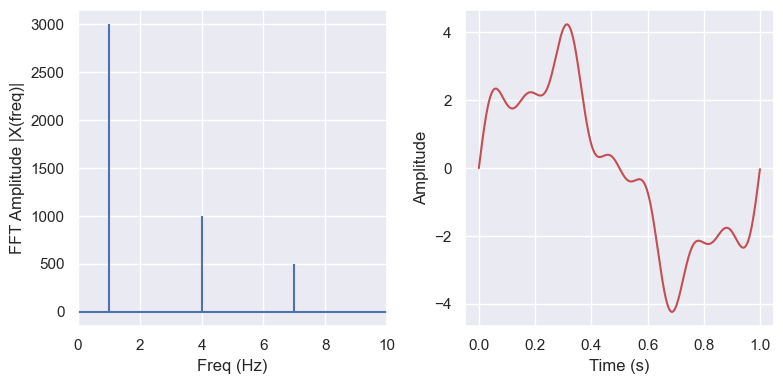

In [5]:
from numpy.fft import fft, ifft # import fft and inverse fft functions

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 4))
plt.subplot(121)

plt.stem(
    freq, np.abs(X), 
    linefmt='b', 
    markerfmt=" ", 
    basefmt="-b"
) 
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X).real, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [9]:
%timeit fft(x)

19.8 µs ± 228 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Scipy

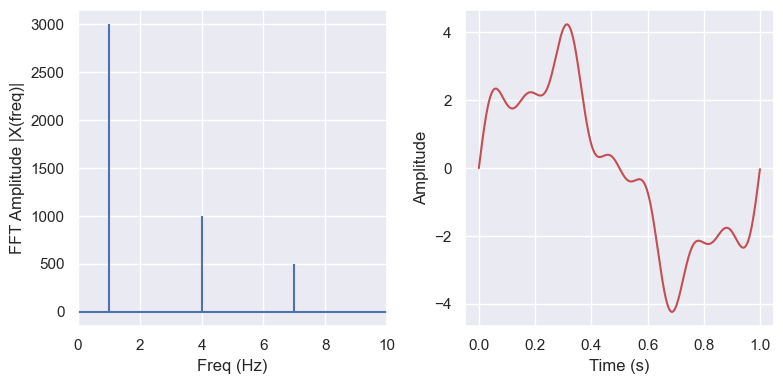

In [13]:
from scipy.fftpack import fft, ifft

X = fft(x)

plt.figure(figsize = (8, 4))
plt.subplot(121)

plt.stem(
    freq, np.abs(X), 
    linefmt='b', 
    markerfmt=" ", 
    basefmt="-b"
) 
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X).real, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [14]:
%timeit fft(x)

13.4 µs ± 105 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Demo

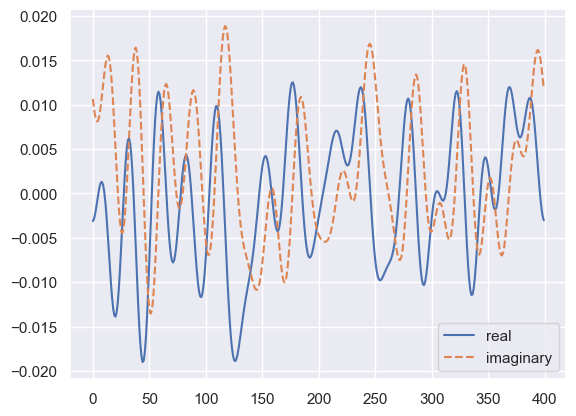

In [23]:
t = np.arange(400)
n = np.zeros((400,), dtype=complex)
n[:20] = np.exp(1j*np.random.uniform(0, 2*np.pi, (20,)))
s = np.fft.ifft(n)
plt.plot(t, s.real, label='real')
plt.plot(t, s.imag, '--', label='imaginary')
plt.legend()
plt.show()

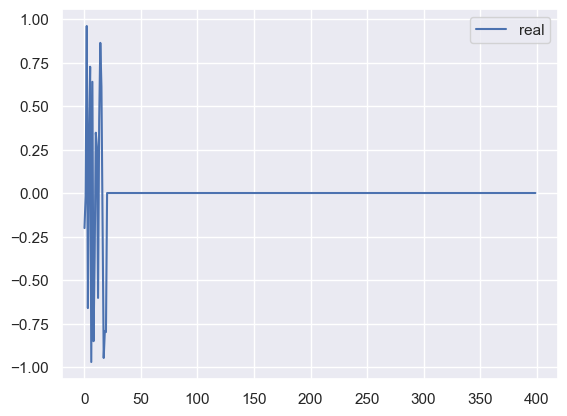

In [25]:
x = np.fft.fft(s)
plt.plot(t, x.real, label='real')
# plt.plot(t, x.imag, '--', label='imaginary')
plt.legend()
plt.show()

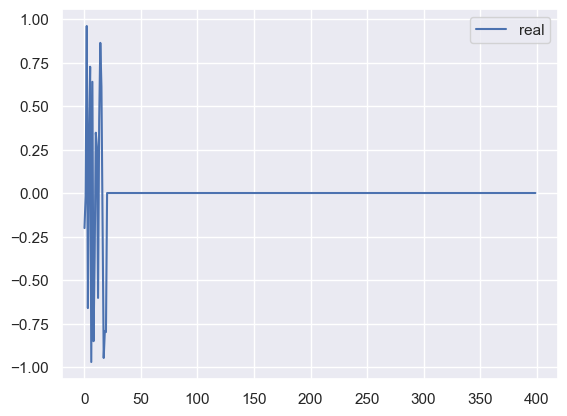

In [26]:
plt.plot(t, n.real, label='real')
# plt.plot(t, x.imag, '--', label='imaginary')
plt.legend()
plt.show()